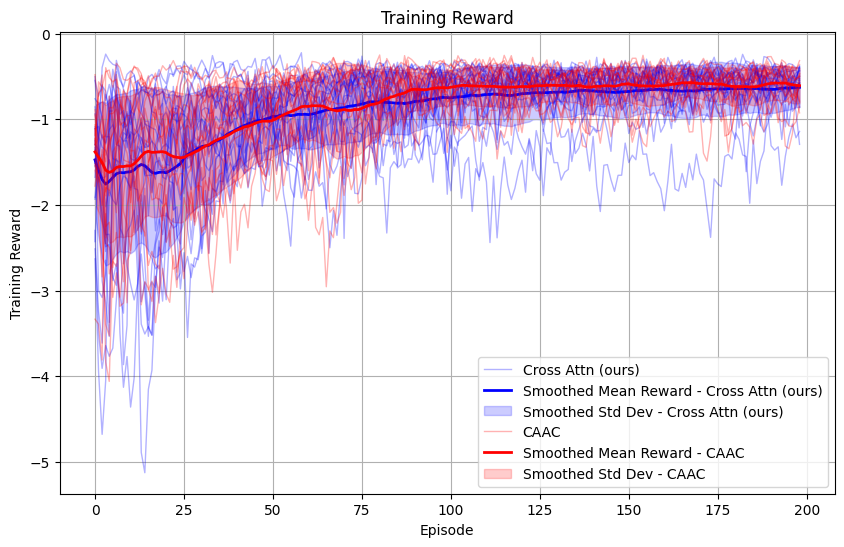

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all1.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all2.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all3.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all4.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all5.csv'
]

# List of CSV file names for the second set
csv_files_caac = [
    './log/A_0_1caac_original2all1.csv',
    './log/A_0_1caac_original2all2.csv',
    './log/A_0_1caac_original2all3.csv',
    './log/A_0_1caac_original2all4.csv',
    './log/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(pattern):
    all_rewards = []
    
    # Use glob to find all files matching the initial pattern
    csv_files = glob.glob(pattern)
    
    # Filter files where the wildcard is a number using regex
    csv_files = [file for file in csv_files if re.search(r'.*all\d+\.csv$', file)]
    
    for file in csv_files:
        df = pd.read_csv(file)[:200]
        all_rewards.append(df['reward'].reset_index(drop=True))
    
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    
    return all_rewards, mean_reward, std_reward

pattern_mine = './log/A_0_1version42all*.csv'
pattern_original = './log/A_0_1caac_original2all*.csv'
# Load and process the data for both sets
rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_and_process_data(pattern_mine)
rewards_caac, mean_reward_caac, std_reward_caac = load_and_process_data(pattern_original)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot individual lines for Cross Attention
for i, reward in enumerate(rewards_cross_att):
    plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'Cross Attn (ours)' if i == 0 else "")

# Plot the smoothed mean and shaded std for Cross Attention
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn (ours)')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn (ours)')

# Plot individual lines for CAAC
for i, reward in enumerate(rewards_caac):
    plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'CAAC' if i == 0 else "")

# Plot the smoothed mean and shaded std for CAAC
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Training Reward')
plt.xlabel('Episode')
plt.ylabel('Training Reward')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all1.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all2.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all3.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all4.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all5.csv'
]

# List of CSV file names for the second set
csv_files_caac = [
    './log/A_0_1caac_original2all1.csv',
    './log/A_0_1caac_original2all2.csv',
    './log/A_0_1caac_original2all3.csv',
    './log/A_0_1caac_original2all4.csv',
    './log/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(pattern):
    all_rewards = []
    
    # Use glob to find all files matching the initial pattern
    csv_files = glob.glob(pattern)
    
    # Filter files where the wildcard is a number using regex
    csv_files = [file for file in csv_files if re.search(r'.*all\d+\.csv$', file)]
    
    for file in csv_files:
        df = pd.read_csv(file)[:200]
        all_rewards.append(df['bunching'].reset_index(drop=True))
    
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    
    return all_rewards, mean_reward, std_reward

pattern_mine = './log/A_0_1td3-version12all*.csv'
pattern_original = './log/A_0_1caac_original2all*.csv'
# Load and process the data for both sets
rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_and_process_data(pattern_mine)
rewards_caac, mean_reward_caac, std_reward_caac = load_and_process_data(pattern_original)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot individual lines for Cross Attention
for i, reward in enumerate(rewards_cross_att):
    plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'Cross Attn (ours)' if i == 0 else "")

# Plot the smoothed mean and shaded std for Cross Attention
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn (ours)')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn (ours)')

# Plot individual lines for CAAC
for i, reward in enumerate(rewards_caac):
    plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'CAAC' if i == 0 else "")

# Plot the smoothed mean and shaded std for CAAC
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Number of Bunchings')
plt.xlabel('Episode')
plt.ylabel('Number of bunchings')
plt.legend()
plt.grid(True)
plt.show()


ValueError: No objects to concatenate

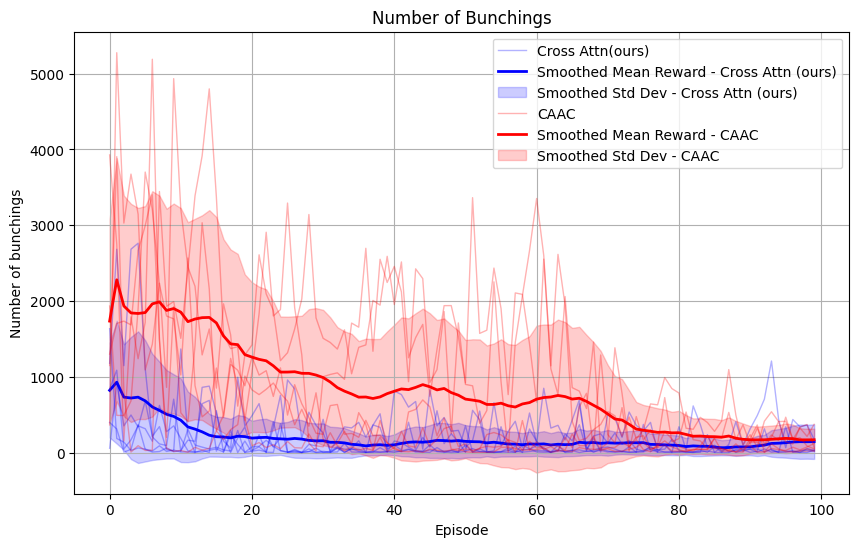

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all1.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all2.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all3.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all4.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all5.csv'
]

# List of CSV file names for the second set
csv_files_caac = [
    './log/A_0_1caac_original2all1.csv',
    './log/A_0_1caac_original2all2.csv',
    './log/A_0_1caac_original2all3.csv',
    './log/A_0_1caac_original2all4.csv',
    './log/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(csv_files):
    all_rewards = []
    for file in csv_files:
        df = pd.read_csv(file)[:100]
        all_rewards.append(df['bunching'].reset_index(drop=True))
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    return all_rewards, mean_reward, std_reward

# Load and process the data for both sets
rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_and_process_data(csv_files_cross_att)
rewards_caac, mean_reward_caac, std_reward_caac = load_and_process_data(csv_files_caac)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot individual lines for Cross Attention
for i, reward in enumerate(rewards_cross_att):
    plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'Cross Attn(ours)' if i == 0 else "")

# Plot the smoothed mean and shaded std for Cross Attention
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn (ours)')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn (ours)')

# Plot individual lines for CAAC
for i, reward in enumerate(rewards_caac):
    plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'CAAC' if i == 0 else "")

# Plot the smoothed mean and shaded std for CAAC
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Number of Bunchings')
plt.xlabel('Episode')
plt.ylabel('Number of bunchings')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all1.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all2.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all3.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all4.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all5.csv'
]

# List of CSV file names for the second set
csv_files_caac = [
    './log/A_0_1caac_original2all1.csv',
    './log/A_0_1caac_original2all2.csv',
    './log/A_0_1caac_original2all3.csv',
    './log/A_0_1caac_original2all4.csv',
    './log/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(csv_files):
    all_rewards = []
    for file in csv_files:
        df = pd.read_csv(file)[:100]
        all_rewards.append(df['bunching'].reset_index(drop=True))
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    return all_rewards, mean_reward, std_reward

# Load and process the data for both sets
rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_and_process_data(csv_files_cross_att)
rewards_caac, mean_reward_caac, std_reward_caac = load_and_process_data(csv_files_caac)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot individual lines for Cross Attention
for i, reward in enumerate(rewards_cross_att):
    plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'Cross Attn(ours)' if i == 0 else "")

# Plot the smoothed mean and shaded std for Cross Attention
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn (ours)')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn (ours)')

# Plot individual lines for CAAC
for i, reward in enumerate(rewards_caac):
    plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'CAAC' if i == 0 else "")

# Plot the smoothed mean and shaded std for CAAC
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Number of Bunchings')
plt.xlabel('Episode')
plt.ylabel('Number of bunchings')
plt.legend()
plt.grid(True)
plt.show()


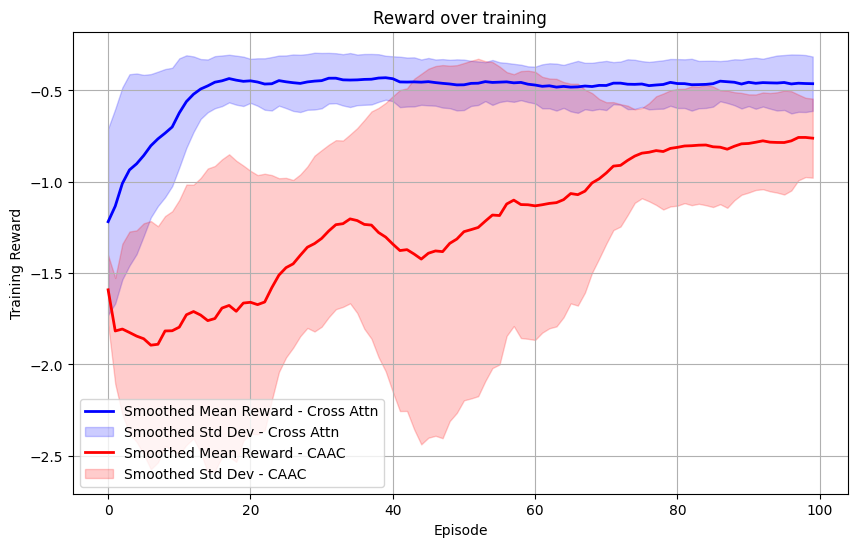

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all1.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all2.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all3.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all4.csv',
    './log/A_0_1CAAC_q_v_cross_attention_crossq2all5.csv'
]

# List of CSV file names for the second set
csv_files_caac = [
    './log/A_0_1caac_original2all1.csv',
    './log/A_0_1caac_original2all2.csv',
    './log/A_0_1caac_original2all3.csv',
    './log/A_0_1caac_original2all4.csv',
    './log/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(csv_files):
    all_rewards = []
    for file in csv_files:
        df = pd.read_csv(file)[:100]
        all_rewards.append(df['reward'].reset_index(drop=True))
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    return mean_reward, std_reward

# Load and process the data for both sets
mean_reward_cross_att, std_reward_cross_att = load_and_process_data(csv_files_cross_att)
mean_reward_caac, std_reward_caac = load_and_process_data(csv_files_caac)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn')

# Plot the cross data
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Reward over training')
plt.xlabel('Episode')
plt.ylabel('Training Reward')
plt.legend()
plt.grid(True)
plt.show()


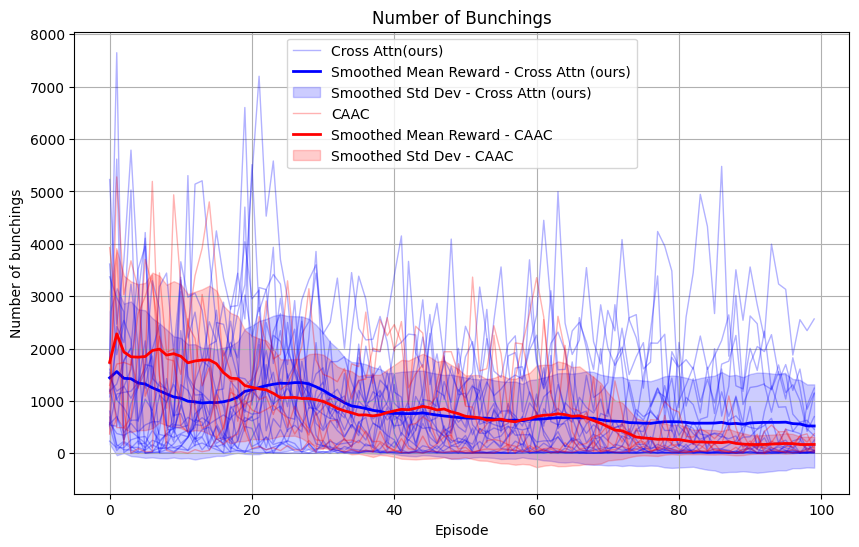

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_experiment2all1.csv',
    './log/A_0_1CAAC_experiment2all2.csv',
    './log/A_0_1CAAC_experiment2all3.csv',
    './log/A_0_1CAAC_experiment2all4.csv',
    './log/A_0_1CAAC_experiment2all5.csv',
    './log/A_0_1CAAC_experiment2all6.csv',
    './log/A_0_1CAAC_experiment2all7.csv',
    './log/A_0_1CAAC_experiment2all8.csv',
    './log/A_0_1CAAC_experiment2all9.csv',
    './log/A_0_1CAAC_experiment2all10.csv',
    './log/A_0_1CAAC_experiment2all11.csv',
    './log/A_0_1CAAC_experiment2all12.csv',
    './log/A_0_1CAAC_experiment2all13.csv',
    './log/A_0_1CAAC_experiment2all14.csv',
    './log/A_0_1CAAC_experiment2all15.csv',
    './log/A_0_1CAAC_experiment2all16.csv',
    './log/A_0_1CAAC_experiment2all17.csv',
    './log/A_0_1CAAC_experiment2all18.csv',
    './log/A_0_1CAAC_experiment2all19.csv',
    './log/A_0_1CAAC_experiment2all20.csv',
]

# List of CSV file names for the second set
csv_files_caac = [
    './log_original/A_0_1caac_original2all1.csv',
    './log_original/A_0_1caac_original2all2.csv',
    './log_original/A_0_1caac_original2all3.csv',
    './log_original/A_0_1caac_original2all4.csv',
    './log_original/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(csv_files):
    all_rewards = []
    for file in csv_files:
        df = pd.read_csv(file)[:100]
        all_rewards.append(df['bunching'].reset_index(drop=True))
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    return all_rewards, mean_reward, std_reward

# Load and process the data for both sets
rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_and_process_data(csv_files_cross_att)
rewards_caac, mean_reward_caac, std_reward_caac = load_and_process_data(csv_files_caac)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot individual lines for Cross Attention
for i, reward in enumerate(rewards_cross_att):
    plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'Cross Attn(ours)' if i == 0 else "")

# Plot the smoothed mean and shaded std for Cross Attention
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn (ours)')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn (ours)')

# Plot individual lines for CAAC
for i, reward in enumerate(rewards_caac):
    plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'CAAC' if i == 0 else "")

# Plot the smoothed mean and shaded std for CAAC
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Number of Bunchings')
plt.xlabel('Episode')
plt.ylabel('Number of bunchings')
plt.legend()
plt.grid(True)
plt.show()


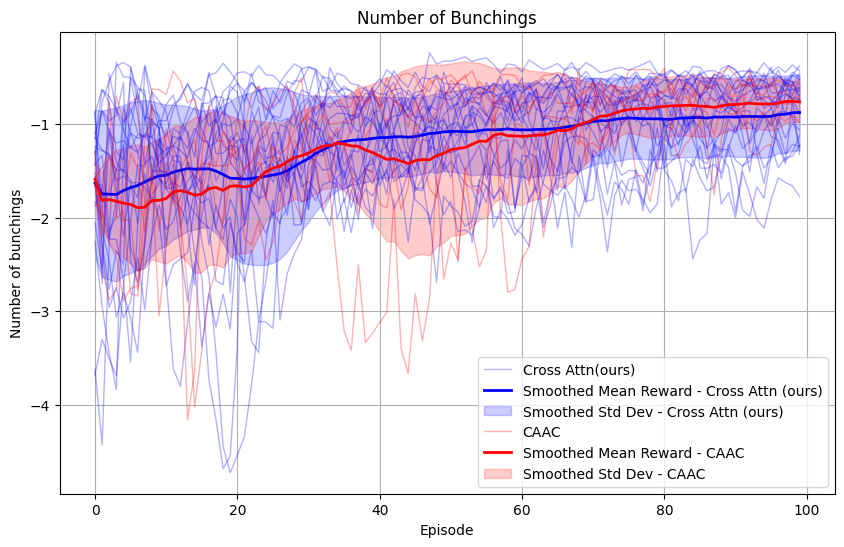

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_experiment2all1.csv',
    './log/A_0_1CAAC_experiment2all2.csv',
    './log/A_0_1CAAC_experiment2all3.csv',
    './log/A_0_1CAAC_experiment2all4.csv',
    './log/A_0_1CAAC_experiment2all5.csv',
    './log/A_0_1CAAC_experiment2all6.csv',
    './log/A_0_1CAAC_experiment2all7.csv',
    './log/A_0_1CAAC_experiment2all8.csv',
    './log/A_0_1CAAC_experiment2all9.csv',
    './log/A_0_1CAAC_experiment2all10.csv',
    './log/A_0_1CAAC_experiment2all11.csv',
    './log/A_0_1CAAC_experiment2all12.csv',
    './log/A_0_1CAAC_experiment2all13.csv',
    './log/A_0_1CAAC_experiment2all14.csv',
    './log/A_0_1CAAC_experiment2all15.csv',
    './log/A_0_1CAAC_experiment2all16.csv',
    './log/A_0_1CAAC_experiment2all17.csv',
    './log/A_0_1CAAC_experiment2all18.csv',
    './log/A_0_1CAAC_experiment2all19.csv',
    './log/A_0_1CAAC_experiment2all20.csv',
]

# List of CSV file names for the second set
csv_files_caac = [
    './log_original/A_0_1caac_original2all1.csv',
    './log_original/A_0_1caac_original2all2.csv',
    './log_original/A_0_1caac_original2all3.csv',
    './log_original/A_0_1caac_original2all4.csv',
    './log_original/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(csv_files):
    all_rewards = []
    for file in csv_files:
        df = pd.read_csv(file)[:100]
        all_rewards.append(df['reward'].reset_index(drop=True))
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    return all_rewards, mean_reward, std_reward

# Load and process the data for both sets
rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_and_process_data(csv_files_cross_att)
rewards_caac, mean_reward_caac, std_reward_caac = load_and_process_data(csv_files_caac)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot individual lines for Cross Attention
for i, reward in enumerate(rewards_cross_att):
    plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'Cross Attn(ours)' if i == 0 else "")

# Plot the smoothed mean and shaded std for Cross Attention
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn (ours)')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn (ours)')

# Plot individual lines for CAAC
for i, reward in enumerate(rewards_caac):
    plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'CAAC' if i == 0 else "")

# Plot the smoothed mean and shaded std for CAAC
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Number of Bunchings')
plt.xlabel('Episode')
plt.ylabel('Number of bunchings')
plt.legend()
plt.grid(True)
plt.show()


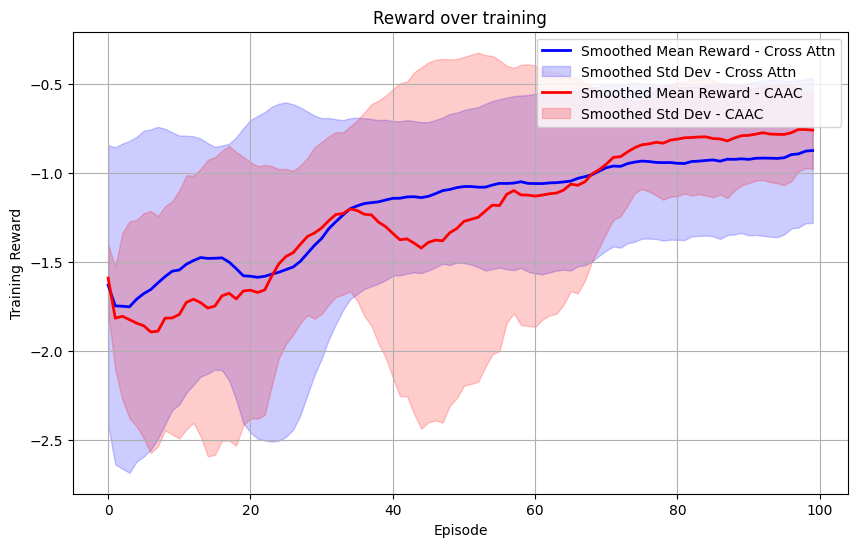

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names for the first set
csv_files_cross_att = [
    './log/A_0_1CAAC_experiment2all1.csv',
    './log/A_0_1CAAC_experiment2all2.csv',
    './log/A_0_1CAAC_experiment2all3.csv',
    './log/A_0_1CAAC_experiment2all4.csv',
    './log/A_0_1CAAC_experiment2all5.csv',
    './log/A_0_1CAAC_experiment2all6.csv',
    './log/A_0_1CAAC_experiment2all7.csv',
    './log/A_0_1CAAC_experiment2all8.csv',
    './log/A_0_1CAAC_experiment2all9.csv',
    './log/A_0_1CAAC_experiment2all10.csv',
    './log/A_0_1CAAC_experiment2all11.csv',
    './log/A_0_1CAAC_experiment2all12.csv',
    './log/A_0_1CAAC_experiment2all13.csv',
    './log/A_0_1CAAC_experiment2all14.csv',
    './log/A_0_1CAAC_experiment2all15.csv',
    './log/A_0_1CAAC_experiment2all16.csv',
    './log/A_0_1CAAC_experiment2all17.csv',
    './log/A_0_1CAAC_experiment2all18.csv',
    './log/A_0_1CAAC_experiment2all19.csv',
    './log/A_0_1CAAC_experiment2all20.csv',
]

# List of CSV file names for the second set
csv_files_caac = [
    './log_original/A_0_1caac_original2all1.csv',
    './log_original/A_0_1caac_original2all2.csv',
    './log_original/A_0_1caac_original2all3.csv',
    './log_original/A_0_1caac_original2all4.csv',
    './log_original/A_0_1caac_original2all5.csv'
]

# Function to load and process data
def load_and_process_data(csv_files):
    all_rewards = []
    for file in csv_files:
        df = pd.read_csv(file)[:100]
        all_rewards.append(df['reward'].reset_index(drop=True))
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    return mean_reward, std_reward

# Load and process the data for both sets
mean_reward_cross_att, std_reward_cross_att = load_and_process_data(csv_files_cross_att)
mean_reward_caac, std_reward_caac = load_and_process_data(csv_files_caac)

# Apply smoothing using a rolling window
window_size = 10
smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, label='Smoothed Mean Reward - Cross Attn')
plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                 smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, label='Smoothed Std Dev - Cross Attn')

# Plot the cross data
plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, label='Smoothed Mean Reward - CAAC')
plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                 smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, label='Smoothed Std Dev - CAAC')

plt.title('Reward over training')
plt.xlabel('Episode')
plt.ylabel('Training Reward')
plt.legend()
plt.grid(True)
plt.show()
